<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [185]:
data = pd.read_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\train1.csv')

In [301]:
test_data = pd.read_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\test.csv')

In [386]:
test_data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,1026.35,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,1872.20,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,75.90,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,2570.00,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,6758.45,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7723.70,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,3488.15,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,875.35,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,212.30,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [190]:
#test_data.sort_values(by='TotalSpent').head(3)

In [302]:
test_data.TotalSpent = data.TotalSpent.replace(' ', '0').astype('float64')

In [192]:
test_data = test_data.drop('TotalSpent', axis=1)

In [195]:
# Заменим пробел в колонке TotalSpent на строку 0, а после изменим тип со строки на float
data.TotalSpent = data.TotalSpent.replace(' ', '0').astype('float64')

In [307]:
test_data.columns


Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')

In [121]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [358]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'TotalSpent',
    'ClientPeriod',
    'MonthlySpending'
    
]#'

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

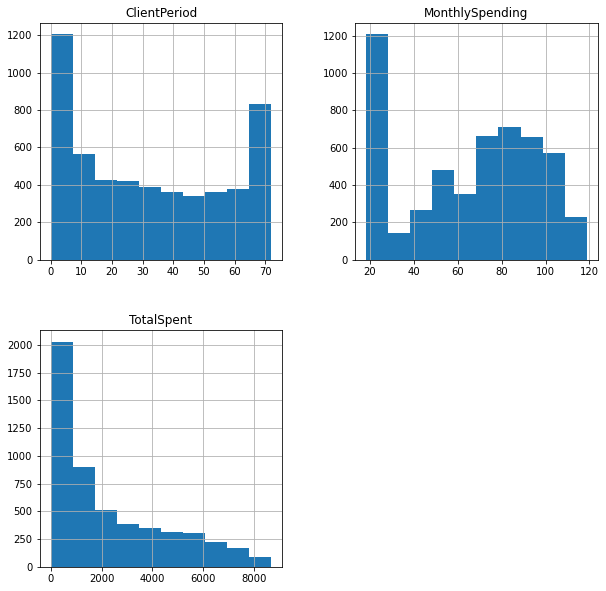

In [125]:
# Для численных призанков
data[num_cols].hist(figsize=(10, 10));

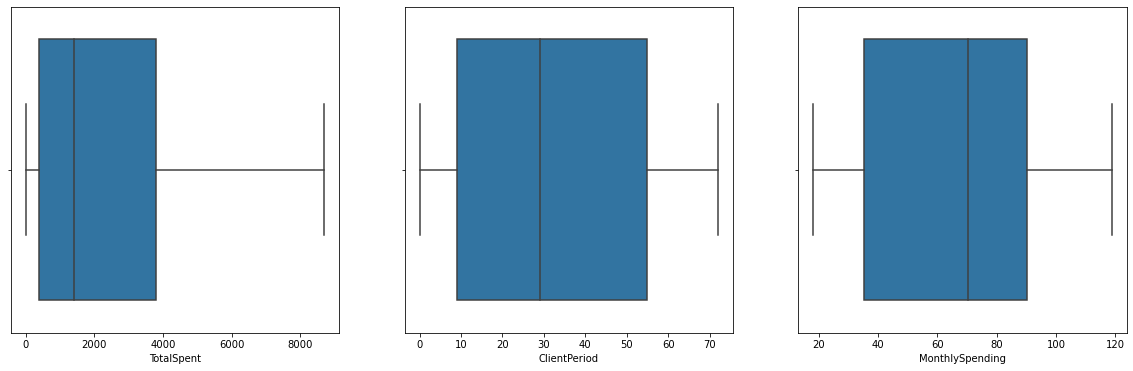

In [126]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(20)
fig.set_figheight(6)

for i in range(3):
    # axs[i].boxplot(x=num_cols[i], data=data)
    sns.boxplot(x=num_cols[i], data=data, ax=axs[i]);

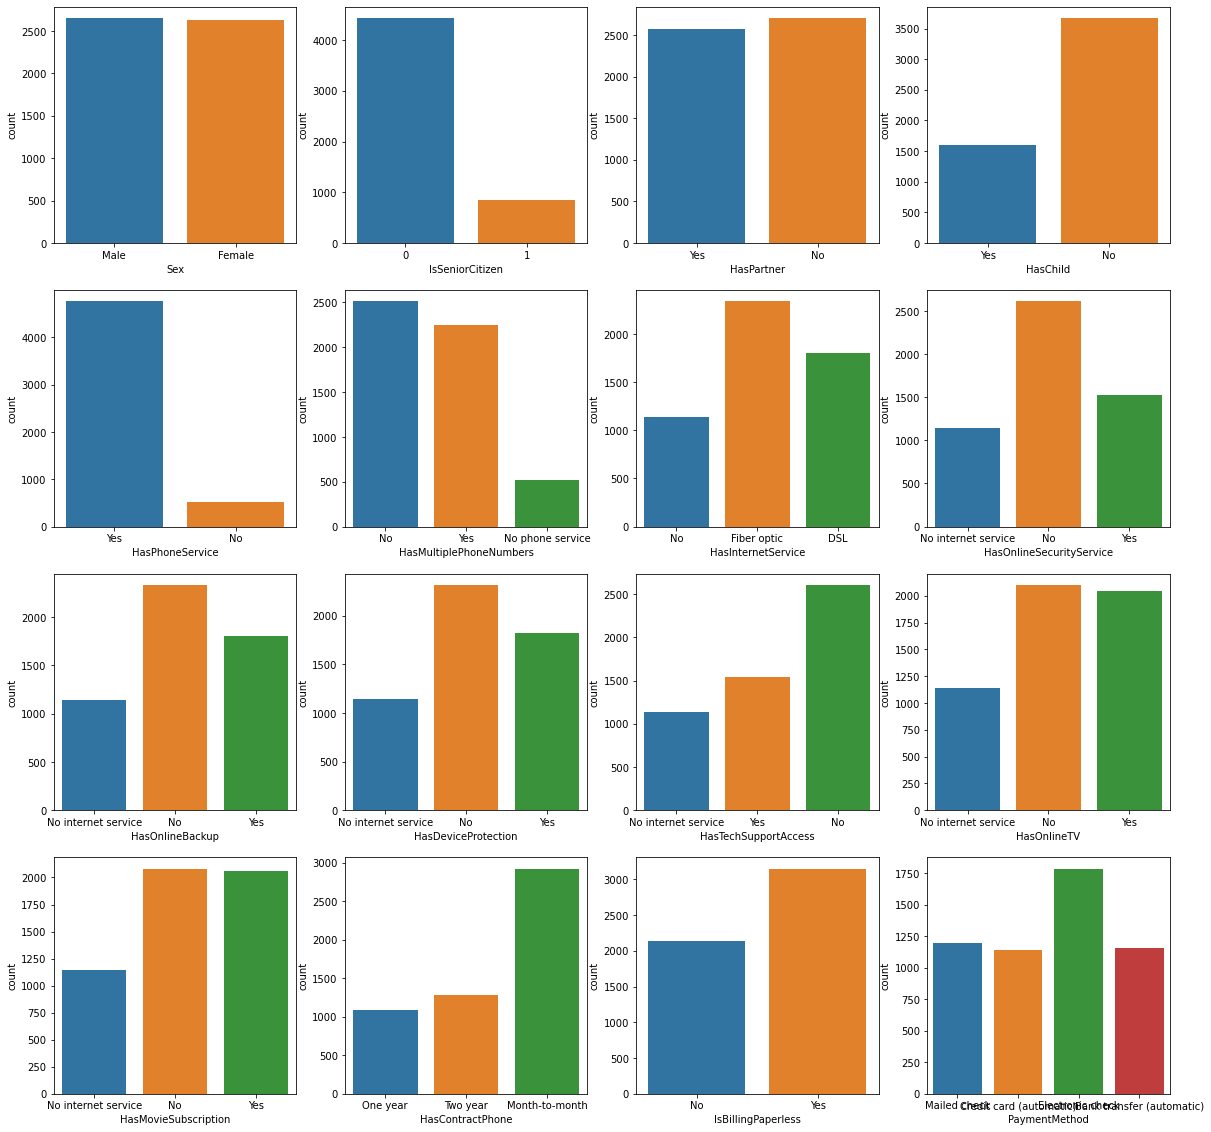

In [18]:
# Для категориальных
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(20)
for i in range(4):
    for j in range(4):
        sns.countplot(x = cat_cols[i * 4 + j], data=data, ax=axs[i, j])

In [394]:
data['HasInternetService'].value_counts().to_dict()


{'Fiber optic': 2341, 'DSL': 1800, 'No': 1141}

In [2]:
sns.countplot(x = 'Churn', data=data)
data['Churn'].value_counts()

NameError: name 'sns' is not defined

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

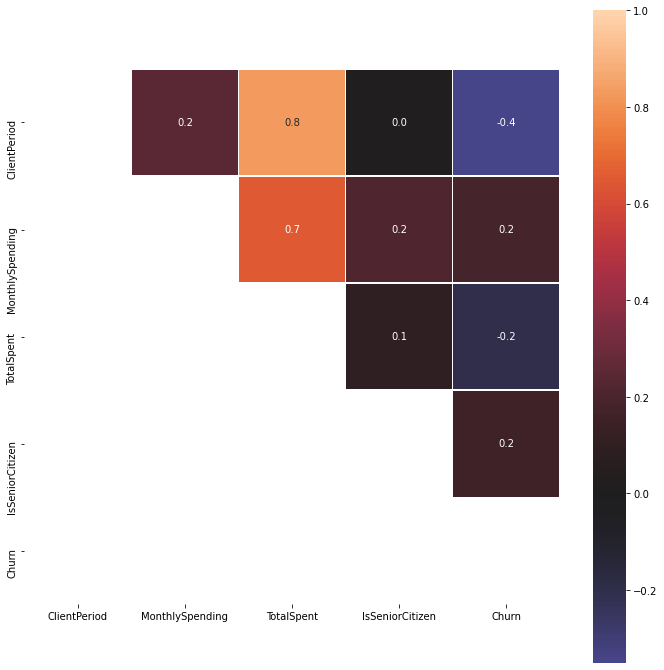

In [128]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 12))
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmax=1, center=0, annot=True, fmt='.1f', square=True, linewidths=.5);

In [ ]:
# Сильная корреляция. Может, удалить TotalSpent?

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [152]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [196]:
# X = data.drop([target_col, 'TotalSpent'], axis=1)
y = data[target_col]

In [310]:
#X = X.drop('TotalSpent', axis=1)
X.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check


In [311]:
'''X_dummies = pd.get_dummies(X[cat_cols], drop_first=True)
X_dummies = X_dummies.join(X[num_cols])
X_dummies'''

'X_dummies = pd.get_dummies(X[cat_cols], drop_first=True)\nX_dummies = X_dummies.join(X[num_cols])\nX_dummies'

In [259]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_dummies, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_dummies)
X_new.shape

#model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_after_lasso = X_dummies.columns[feature_idx].values
feature_after_lasso

array(['IsSeniorCitizen', 'HasChild_Yes', 'HasPhoneService_Yes',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_Fiber optic',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_Yes',
       'HasTechSupportAccess_No internet service',
       'HasTechSupportAccess_Yes', 'HasContractPhone_One year',
       'HasContractPhone_Two year', 'IsBillingPaperless_Yes',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TotalSpent', 'ClientPeriod', 'MonthlySpending'], dtype=object)

In [312]:
# Сохраним названия колонок, которые хотим оставить - изначальные названия
feature_after_lasso = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen', 'HasChild', 'HasPhoneService',
                       'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 
                       'HasDeviceProtection','HasTechSupportAccess', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']

In [314]:
n_features_to_test = np.arange(10, 25)
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer()]

In [286]:
'''numeric_cols = [
    'ClientPeriod', 
    'MonthlySpending', 
    'TotalSpent'
]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_cols)])'''


In [315]:
numerical_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())])


categorical_cols = ['IsSeniorCitizen', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 
                    'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 
                    'HasTechSupportAccess', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [316]:
'''    

    ('reduce_dim', PCA()),
'''

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LogisticRegression())
])

In [317]:
'''     'reduce_dim__n_components': n_features_to_test,    '''

params = {'preprocessor__num__scaler': scalers_to_test,
          'regression__C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_after_lasso], y, test_size=0.2, random_state=42)

#X_train, y_train = X[feature_after_lasso], y
X_train

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasContractPhone,IsBillingPaperless,PaymentMethod
4556,31,73.55,2094.65,1,No,Yes,No,Fiber optic,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
1468,59,100.05,6034.85,0,No,Yes,No,Fiber optic,No,Yes,No,Yes,Two year,Yes,Mailed check
3142,60,99.00,6017.90,1,No,Yes,Yes,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Electronic check
2093,6,73.85,401.30,0,No,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check
1505,72,24.75,1859.10,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,14,91.65,1301.00,0,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Electronic check
3772,19,73.20,1441.10,0,No,Yes,No,Fiber optic,Yes,No,No,No,Month-to-month,Yes,Electronic check
5191,50,20.55,1070.25,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
5226,8,84.50,662.65,0,No,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,No,Bank transfer (automatic)


In [334]:
clf = GridSearchCV(pipeline, params, verbose=1000, scoring='roc_auc')

In [335]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] preprocessor__num__scaler=StandardScaler(), regression__C=100 ...
[CV]  preprocessor__num__scaler=StandardScaler(), regression__C=100, score=0.830, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] preprocessor__num__scaler=StandardScaler(), regression__C=100 ...
[CV]  preprocessor__num__scaler=StandardScaler(), regression__C=100, score=0.835, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] preprocessor__num__scaler=StandardScaler(), regression__C=100 ...
[CV]  preprocessor__num__scaler=StandardScaler(), regression__C=100, score=0.857, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] preprocessor__num__scaler=StandardScaler(), regression__C=100 ...
[CV]  preprocessor__num__scaler=StandardScaler

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                  

In [336]:
'''
{'preprocessor__num__scaler': QuantileTransformer(),
 'reduce_dim__n_components': 21,
 'regression__C': 100}
'''

clf.best_params_

{'preprocessor__num__scaler': QuantileTransformer(), 'regression__C': 100}

In [322]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [323]:
roc_auc_score(y_test, y_pred_proba)

0.8286910907730811

In [187]:
roc_auc_score(y_test, y_pred_proba)

0.8402517566191667

# FOR Kaggle - 0.84911

In [332]:
y_pred_for_kaggle = clf.predict_proba(test_data[feature_after_lasso])[:, 1]
y_pred_for_kaggle

array([0.06405793, 0.70788833, 0.7633446 , ..., 0.80509576, 0.71079568,
       0.02197588])

In [330]:
# FOR Kaggle
solution = pd.DataFrame({"Id": test_data.index, 'Churn': y_pred_for_kaggle})
solution.to_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\out_lasso.csv', index=False)
solution

,Id,Churn
0,0,0.064058
1,1,0.707888
2,2,0.763345
3,3,0.008942
4,4,0.003036
...,...,...
1756,1756,0.077149
1757,1757,0.012958
1758,1758,0.805096
1759,1759,0.710796


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [9]:
# pip install catboost

In [10]:
# pip install ipywidgets

In [355]:
from catboost import CatBoostClassifier

In [357]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [359]:
X = data[feature_cols]
#[feature_after_lasso]
y = data[target_col]
X.head(3)

,TotalSpent,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,1026.35,55,19.50,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,1872.20,72,25.85,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,75.90,1,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check


In [387]:
#CB_X_train, CB_X_test, CB_y_train, CB_y_test = train_test_split(X, y, test_size=0.2, random_state=42)
CB_X_train, CB_y_train = X, y
CB_X_train.shape

(5282, 19)

In [372]:
params = {
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

"""'loss_function': ['Logloss', 'CrossEntropy', 'MultiClass', 'MultiClassOneVsAll'],
    'eval_metric': 'AUC',
    'random_seed': 42,
    
    !!!!
model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=4, l2_leaf_reg=7, learning_rate=0.03)
'params': {'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.03}
    """



# for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll or custom objective object

model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC')
grid_search_result = model.grid_search(params, X=CB_X_train, y=CB_y_train)


bestTest = 0.842089372
bestIteration = 655

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8420894	best: 0.8420894 (0)	total: 21.5s	remaining: 10m 24s

bestTest = 0.8411799804
bestIteration = 237

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8411800	best: 0.8420894 (0)	total: 43.4s	remaining: 10m 7s

bestTest = 0.8427938808
bestIteration = 658

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8427939	best: 0.8427939 (2)	total: 1m 6s	remaining: 10m 1s

bestTest = 0.8438434553
bestIteration = 160

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8438435	best: 0.8438435 (3)	total: 1m 29s	remaining: 9m 44s

In [373]:
grid_search_result.fit(CB_X_train, CB_y_train)

{'params': {'depth': 4, 'l2_leaf_reg': 7, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [381]:
#y_pred_proba = grid_search_result.predict_proba(CB_X_test)[:, 1]
#roc_auc_score(CB_y_test, y_pred_proba)

In [383]:
model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=4, l2_leaf_reg=7, learning_rate=0.03)

model.fit(X=CB_X_train, y=CB_y_train)

0:	total: 55.1ms	remaining: 55.1s
1:	total: 72.4ms	remaining: 36.1s
2:	total: 91.7ms	remaining: 30.5s
3:	total: 113ms	remaining: 28.2s
4:	total: 131ms	remaining: 26.1s
5:	total: 150ms	remaining: 24.8s
6:	total: 171ms	remaining: 24.2s
7:	total: 195ms	remaining: 24.1s
8:	total: 218ms	remaining: 24s
9:	total: 236ms	remaining: 23.3s
10:	total: 255ms	remaining: 22.9s
11:	total: 275ms	remaining: 22.6s
12:	total: 298ms	remaining: 22.6s
13:	total: 320ms	remaining: 22.5s
14:	total: 340ms	remaining: 22.4s
15:	total: 362ms	remaining: 22.2s
16:	total: 384ms	remaining: 22.2s
17:	total: 403ms	remaining: 22s
18:	total: 424ms	remaining: 21.9s
19:	total: 445ms	remaining: 21.8s
20:	total: 466ms	remaining: 21.7s
21:	total: 503ms	remaining: 22.4s
22:	total: 527ms	remaining: 22.4s
23:	total: 550ms	remaining: 22.4s
24:	total: 561ms	remaining: 21.9s
25:	total: 580ms	remaining: 21.7s
26:	total: 599ms	remaining: 21.6s
27:	total: 620ms	remaining: 21.5s
28:	total: 638ms	remaining: 21.4s
29:	total: 659ms	remainin

In [385]:
# Fit model
# model.fit(CB_X_train, CB_y_train, cat_features=categorical_cols)
# , plot=True

In [378]:
# Get predictions
y_pred_proba = model.predict_proba(CB_X_test)[:, 1]

In [111]:
# Get predictions
#y_pred = model.predict(CB_X_test)

In [112]:
#model.feature_importances_

In [113]:
#model.score(CB_X_test, CB_y_test)

0.7924751538097492

In [380]:
roc_auc_score(CB_y_test, y_pred_proba)

0.8267586187789178

In [43]:
roc_auc_score(CB_y_test, y_pred_proba)

0.8350889097947286

# FOR Kaggle - 0.85123

In [183]:
y_pred_for_kaggle = model.predict_proba(test_data[feature_after_lasso])[:, 1]

y_pred_for_kaggle

array([0.03976976, 0.73940117, 0.67836537, ..., 0.88080049, 0.53294777,
       0.00733948])

In [388]:
# FOR Kaggle
solution = pd.DataFrame({"Id": test_data.index, 'Churn': y_pred_for_kaggle})
solution.to_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\out_grid_Lasso_CatBoost.csv', index=False)
solution

,Id,Churn
0,0,0.064058
1,1,0.707888
2,2,0.763345
3,3,0.008942
4,4,0.003036
...,...,...
1756,1756,0.077149
1757,1757,0.012958
1758,1758,0.805096
1759,1759,0.710796


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

In [354]:
X_test = pd.read_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\test.csv')
submission = pd.read_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\submission.csv')

#submission['Churn'] = # best_model.predict_proba(X_test)
#submission.to_csv(r'C:\Audiobooks\ForDS\ML_MFIT\ДЗ_3\my_submission.csv')

submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.